## SAGSIN Dataset Tutorial

Ground CSV cheatsheet: `ground_madagascar_moz.csv` (~lat -26 to -14, lon 30 to 48), `ground_mexico.csv` (~lat 15 to 33, lon -117 to -87), `ground_usa_west.csv` (~lat 14 to 70, lon -159 to 145), `ground_usa_mid.csv` (~lat 18 to 62, lon -159 to -65).
Latitude increases northward and longitude increases eastward, so every plot below uses `[min_lon, max_lon]` and `[min_lat, max_lat]` ranges to carve out map windows. Configure `env.DataManager` with those ranges and render the resulting layers using `env.PlotManager`.

#### 1. Synthetic environment
`DataManager` automatically loads the Natural Earth shapefiles from `assets/map`. Specify the geographic window and node counts to build a synthetic layout.
Longitude window [15, 45], latitude window [25, 45] (Central Asia).
`PlotManager.plot(dm, legend=True)` draws the geographic layers and node icons and pins the legend to the top center of the figure.

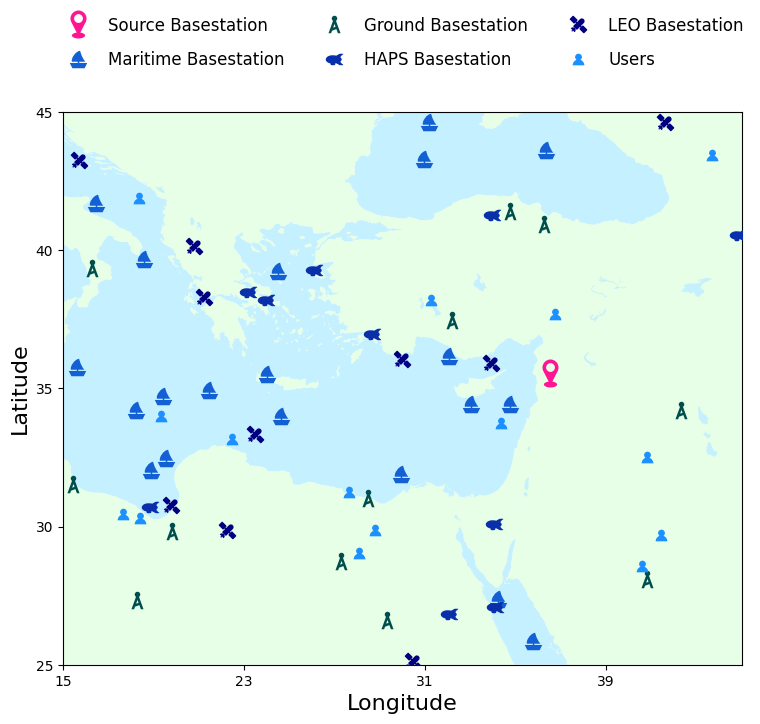

In [12]:
from sagsin import environment as env

dm = env.DataManager(
    longitude_range=[15, 45],
    latitude_range=[25, 45],
    num_ground_basestations=12,
    num_maritime_basestations=20,
    num_haps_basestations=10,
    num_leo_basestations=10,
    num_users=15,
    random_seed=7,
)
pm = env.PlotManager()
pm.plot(dm, legend=True);

#### 2. Madagascar–Mozambique Channel
Mirrors `real_data.ipynb`: OpenCelliD ground stations, AIS maritime samples, HAPS logs from September 2020, and Starlink LEO snapshots.
Data window: lon 32–50E, lat -23–-12; uses `ground_madagascar_moz.csv`.


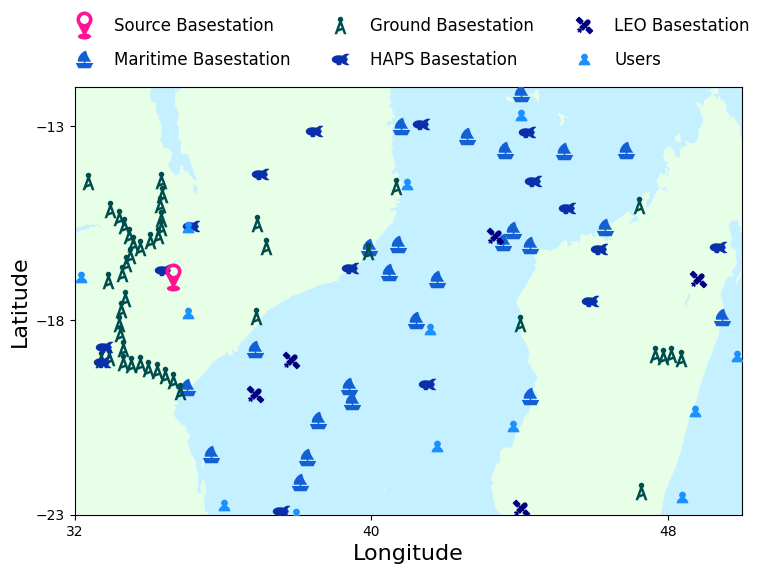

In [13]:
import datetime as dt
import random
from pathlib import Path

latitude_range_mada = [-23, -12]
longitude_range_mada = [32, 50]
random_seed_mada = 7
random.seed(random_seed_mada)

map_dir = Path(env.DEFAULT_MAP_DIR)

ground_coords_mada = env.load_ground_positions(
    str(map_dir / 'ground_madagascar_moz.csv'),
    latitude_range_mada,
    longitude_range_mada,
    duplicate_tol=0.2,
)
maritime_coords_mada = random.sample(
    env.load_maritime_positions(str(map_dir / 'maritime_positions.csv')),
    60,
)
haps_coords_mada = env.load_haps_positions(
    str(map_dir / 'haps_positions.csv'),
    dt.datetime(2020, 9, 28, 10, 0),
)
leo_coords_mada = random.sample(
    env.load_leo_positions(
        str(map_dir / 'starlink_positions.csv'),
        latitude_range_mada,
        longitude_range_mada,
    ),
    5,
)

area_size_mada = (latitude_range_mada[1] - latitude_range_mada[0]) * (longitude_range_mada[1] - longitude_range_mada[0])
config_mada = {
    'num_maritime_basestations': int(area_size_mada / 4),
    'num_ground_basestations': int(area_size_mada / 4),
    'num_haps_basestations': int(area_size_mada / 50),
    'num_leo_basestations': int(area_size_mada / 60),
    'num_users': int(area_size_mada / 15),
    'random_seed': random_seed_mada,
    'longitude_range': longitude_range_mada,
    'latitude_range': latitude_range_mada,
}

dm_mada = env.DataManager(
    **config_mada,
    ground_coords=ground_coords_mada,
    maritime_coords=maritime_coords_mada,
    haps_coords=haps_coords_mada,
    leo_coords=leo_coords_mada,
)
pm.plot(dm_mada, legend=True);

#### 3. Western North America
Adapted from `real_data_2.ipynb`: combines Mexican and U.S. West Coast ground stations, maritime samples, July 2020 HAPS logs, a fixed source, and manually defined users.
Data windows: Mexico/USA lon -120–-90, lat 23–38 using `ground_mexico.csv` + `ground_usa_west.csv`.


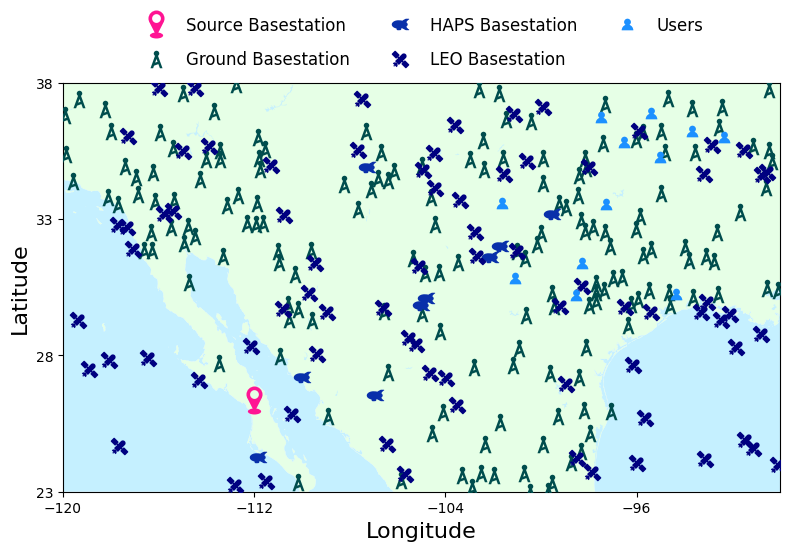

In [14]:
import datetime as dt
import random
from pathlib import Path

latitude_range_na = [23, 38]
longitude_range_na = [-120, -90]
random_seed_na = 3
random.seed(random_seed_na)

map_dir = Path(env.DEFAULT_MAP_DIR)

ground_coords_mex_full = env.load_ground_positions(
    str(map_dir / 'ground_mexico.csv'),
    latitude_range_na,
    longitude_range_na,
    duplicate_tol=0.3,
)
ground_coords_usa_full = env.load_ground_positions(
    str(map_dir / 'ground_usa_west.csv'),
    latitude_range_na,
    longitude_range_na,
    duplicate_tol=0.3,
)
# keep roughly 20% of the available sites to reduce clutter
ground_coords_mex = random.sample(
    ground_coords_mex_full,
    max(1, int(len(ground_coords_mex_full) * 0.2)),
)
ground_coords_usa = random.sample(
    ground_coords_usa_full,
    max(1, int(len(ground_coords_usa_full) * 0.2)),
)
maritime_coords_na = random.sample(
    env.load_maritime_positions(str(map_dir / 'maritime_positions.csv')),
    50,
)
haps_coords_na = env.load_haps_positions(
    str(map_dir / 'haps_positions.csv'),
    dt.datetime(2020, 7, 29, 0, 0),
)
leo_coords_na = env.load_leo_positions(
    str(map_dir / 'starlink_positions.csv'),
    latitude_range_na,
    longitude_range_na,
)
user_coords_na = [
    (random.uniform(30, 37), random.uniform(-104, -92))
    for _ in range(12)
]

area_size_na = (latitude_range_na[1] - latitude_range_na[0]) * (longitude_range_na[1] - longitude_range_na[0])
config_na = {
    'num_maritime_basestations': int(area_size_na / 4),
    'num_ground_basestations': int(area_size_na / 4),
    'num_haps_basestations': int(area_size_na / 50),
    'num_leo_basestations': 1,
    'num_users': int(area_size_na / 15),
    'random_seed': random_seed_na,
    'longitude_range': longitude_range_na,
    'latitude_range': latitude_range_na,
}

dm_na = env.DataManager(
    **config_na,
    source_coords=[(26, -112)],
    ground_coords=ground_coords_mex + ground_coords_usa,
    maritime_coords=maritime_coords_na,
    haps_coords=haps_coords_na,
    leo_coords=leo_coords_na,
    user_coords=user_coords_na,
)
pm.plot(dm_na, legend=True);